In [51]:
import pandas as pd
import numpy as np
import pickle
import os

pd.set_option('max_columns', None)
pd.set_option('max_rows', 140)

# for visualising the matrices
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import warnings
warnings.filterwarnings('ignore')

import xGils.xT as xT
import xGils.xLoad as xLoad

# **Loading Synthetic Shot Data**

In [52]:
df_synthetic = pd.read_csv('/Users/christian/Desktop/University/Birkbeck MSc Applied Statistics/Project/Data/Synthetic/Synthetic_Shots.csv')

# **Loading Wyscout Data (Flat CSV load)**

In [53]:
cg_xT_repo = r'/Users/christian/Desktop/University/Birkbeck MSc Applied Statistics/Project/Data/Analysis Ready/Wyscout xT'
spadl_xT_repo = r'/Users/christian/Desktop/University/Birkbeck MSc Applied Statistics/Project/Data/Analysis Ready/Wyscout SPADL xT xG'
ref_repo = r'/Users/christian/Desktop/University/Birkbeck MSc Applied Statistics/Project/Data/Analysis Ready/Wyscout Reference'
wyscout_events = r'/Users/christian/Desktop/University/Birkbeck MSc Applied Statistics/Project/Data/Analysis Ready/Wyscout Fully Loaded Events'

In [54]:
df_ref = pd.read_csv(os.path.join(ref_repo, 'df_wyscout_formations.csv'))
df_players = pd.read_csv(os.path.join(ref_repo, 'player_positions.csv'))
df_teams = pd.read_csv(os.path.join(ref_repo, 'df_teams.csv'))

In [55]:
%%time

# this is the engineered master data that resulted from the 
df_wyscout = pd.read_csv(os.path.join(wyscout_events, 'Wyscout_Engineered_Events.csv'), converters={'tags': eval})

print (f'{len(df_wyscout)} rows in *df_wyscout*')

df_wyscout.head()

3025256 rows in *df_wyscout*
CPU times: user 26.1 s, sys: 3.97 s, total: 30.1 s
Wall time: 34 s


,source,matchId,matchPeriod,eventSec,possessionTimeSec,playerPossessionTimeSec,matchEventIndex,teamId,homeTeamId,homeScore,awayTeamId,awayScore,homeFlag,id,eventName,subEventName,previousSubEventName,possessionTeamId,possessionSequenceIndex,playerId,shortName,roleCode,strongFlag,weakFlag,goalDelta,numReds,start_x,start_y,end_x,end_y,tags,successFlag
0,European_Championship,1694390,1H,1.255990,0.000000,0.0,1,4418,4418,2,11944,1,1,88178642,Pass,Simple pass,Match Start,4418,1,26010,O. Giroud,FWD,0,0,0,0,50,48,47.0,50.0,[1801],1
1,European_Championship,1694390,1H,2.351908,1.095918,0.0,2,4418,4418,2,11944,1,1,88178643,Pass,Simple pass,Match Start,4418,1,3682,A. Griezmann,FWD,0,0,0,0,47,50,41.0,48.0,[1801],1
2,European_Championship,1694390,1H,3.241028,1.985038,0.0,3,4418,4418,2,11944,1,1,88178644,Pass,Simple pass,Match Start,4418,1,31528,N. Kanté,MID,0,0,0,0,41,48,32.0,35.0,[1801],1
3,European_Championship,1694390,1H,6.033681,4.777691,0.0,4,4418,4418,2,11944,1,1,88178645,Pass,High pass,Match Start,4418,1,7855,L. Koscielny,DEF,0,0,0,0,32,35,89.0,6.0,[1802],0
4,European_Championship,1694390,1H,13.143591,11.887601,0.0,5,4418,4418,2,11944,1,1,88178646,Duel,Ground defending duel,Match Start,4418,1,25437,B. Matuidi,MID,0,0,0,0,89,6,85.0,0.0,"[702, 1801]",1


# **Loading SPADL pre-packed xT data for comparison with our model**

In [56]:
df_spadl = pd.read_csv(os.path.join(spadl_xT_repo, 'SPADL_xT.csv'))

### **Wyscout Event / Tags**

#### **Wyscount Tags**

In [57]:
dic_tags = {
     101: 'Goal',
     102: 'Own goal',
     301: 'Assist',
     302: 'Key pass',
     1901: 'Counter attack',
     401: 'Left foot',
     402: 'Right foot',
     403: 'Head/body',
     1101: 'Direct',
     1102: 'Indirect',
     2001: 'Dangerous ball lost',
     2101: 'Blocked',
     801: 'High',
     802: 'Low',
     1401: 'Interception',
     1501: 'Clearance',
     201: 'Opportunity',
     1301: 'Feint',
     1302: 'Missed ball',
     501: 'Free space right',
     502: 'Free space left',
     503: 'Take on left',
     504: 'Take on right',
     1601: 'Sliding tackle',
     601: 'Anticipated',
     602: 'Anticipation',
     1701: 'Red card',
     1702: 'Yellow card',
     1703: 'Second yellow card',
     1201: 'Position: Goal low center',
     1202: 'Position: Goal low right',
     1203: 'Position: Goal center',
     1204: 'Position: Goal center left',
     1205: 'Position: Goal low left',
     1206: 'Position: Goal center right',
     1207: 'Position: Goal high center',
     1208: 'Position: Goal high left',
     1209: 'Position: Goal high right',
     1210: 'Position: Out low right',
     1211: 'Position: Out center left',
     1212: 'Position: Out low left',
     1213: 'Position: Out center right',
     1214: 'Position: Out high center',
     1215: 'Position: Out high left',
     1216: 'Position: Out high right',
     1217: 'Position: Post low right',
     1218: 'Position: Post center left',
     1219: 'Position: Post low left',
     1220: 'Position: Post center right',
     1221: 'Position: Post high center',
     1222: 'Position: Post high left',
     1223: 'Position: Post high right',
     901: 'Through',
     1001: 'Fairplay',
     701: 'Lost',
     702: 'Neutral',
     703: 'Won',
     1801: 'Accurate',
     1802: 'Not accurate'
}

### Wyscout **eventName** and **subEventName** counts.

In [58]:
df_wyscout.eventName.value_counts()

Pass                       1665477
Duel                        795883
Others on the ball          256980
Free Kick                   181171
Foul                         50706
Shot                         43075
Save attempt                 17615
Offside                       8154
Goalkeeper leaving line       6165
Interruption                    30
Name: eventName, dtype: int64

In [59]:
df_wyscout.subEventName.value_counts()

Simple pass                1285986
Ground attacking duel       256944
Ground defending duel       249235
Touch                       174280
Air duel                    156087
Ground loose ball duel      133617
High pass                   130214
Head pass                    96910
Throw in                     82808
Cross                        62330
Clearance                    56814
Foul                         46808
Launch                       45731
Shot                         43075
Free Kick                    36071
Goal kick                    31604
Smart pass                   30302
Acceleration                 25886
Corner                       19185
Hand pass                    14004
Reflexes                     10803
Free kick cross               8636
Save attempt                  6812
Goalkeeper leaving line       6165
Free kick shot                2209
Hand foul                     2071
Penalty                        658
Protest                        598
Out of game foul    

## Aim of the game:

**Want to produce an events dataset with a similar set of events as the Opta data**

> We just want to map successful and unsuccessful pass / dribble / shot events

> The tricky thing with Wyscout is getting the dribbles right - and we just need to sort out the tags in this situation

> Create a Christian-Event-Type column to add on to this dataset, and then push it through your xT library

> May need to tweak a few things like the coordinates...

### Transformation Functions

In [60]:
# adding a few more flags (general successFlag means whether the shot was accurate (i.e. on target), not necessarily if a goal happened)
df_wyscout['goalScoredFlag'] = df_wyscout.tags.apply(lambda x: 1 if 101 in x else 0)

# take on if 503 or 504
df_wyscout['takeOnFlag'] = df_wyscout.tags.apply(lambda x: 1 if 503 in x else (1 if 504 in x else 0))

# dribble if a 502 or 501
df_wyscout['dribbleFlag'] = df_wyscout.tags.apply(lambda x: 1 if 503 in x else (1 if 504 in x else (1 if 502 in x else (1 if 501 in x else 0))))

# dribble success: win if 703, neutral if 702, loss if 701 (we'll want to punish losses and do nothing with neutral encounters) 
df_wyscout['dribbleSuccessFlag'] = df_wyscout.tags.apply(lambda x: 1 if 703 in x else (2 if 702 in x else 0))

# starting off with a blank slate of not relevant
df_wyscout['eventSubType'] = 'Not Relevant'

# passes are nice and easy
df_wyscout.loc[((df_wyscout['eventName'] == 'Pass') & (df_wyscout['successFlag'] == 1)),'eventSubType'] = 'Successful Pass'
df_wyscout.loc[((df_wyscout['eventName'] == 'Pass') & (df_wyscout['successFlag'] == 0)),'eventSubType'] = 'Failed Pass'

# shots require the new shot flag (we're classifying a failed shot as one that does not score a goal)
df_wyscout.loc[((df_wyscout['eventName'] == 'Shot') & (df_wyscout['goalScoredFlag'] == 1)),'eventSubType'] = 'Goal'
df_wyscout.loc[((df_wyscout['eventName'] == 'Shot') & (df_wyscout['goalScoredFlag'] == 0)),'eventSubType'] = 'Failed Shot'

# take-ons (more aggressive dribbles where the attacking player is trying to beat his/her man)
df_wyscout.loc[((df_wyscout['subEventName'] == 'Ground attacking duel') & (df_wyscout['dribbleFlag'] == 1) & (df_wyscout['dribbleSuccessFlag'] == 1)),'eventSubType'] = 'Successful Dribble'
df_wyscout.loc[((df_wyscout['subEventName'] == 'Ground attacking duel') & (df_wyscout['dribbleFlag'] == 1) & (df_wyscout['dribbleSuccessFlag'] == 2)),'eventSubType'] = 'Neutral Dribble'
df_wyscout.loc[((df_wyscout['subEventName'] == 'Ground attacking duel') & (df_wyscout['dribbleFlag'] == 1) & (df_wyscout['dribbleSuccessFlag'] == 0)),'eventSubType'] = 'Failed Dribble'

# dribbles
df_wyscout.loc[((df_wyscout['subEventName'] == 'Ground attacking duel') & (df_wyscout['takeOnFlag'] == 1) & (df_wyscout['dribbleSuccessFlag'] == 1)),'eventSubType'] = 'Successful Take-On'
df_wyscout.loc[((df_wyscout['subEventName'] == 'Ground attacking duel') & (df_wyscout['takeOnFlag'] == 1) & (df_wyscout['dribbleSuccessFlag'] == 2)),'eventSubType'] = 'Neutral Take-On'
df_wyscout.loc[((df_wyscout['subEventName'] == 'Ground attacking duel') & (df_wyscout['takeOnFlag'] == 1) & (df_wyscout['dribbleSuccessFlag'] == 0)),'eventSubType'] = 'Failed Take-On'



In [61]:
# Quick check of how things look against the Opta data
df_wyscout.loc[df_wyscout['source'] == 'England'].eventSubType.value_counts()

Successful Pass       271280
Not Relevant          237572
Failed Pass            57371
Successful Dribble      8840
Failed Shot             7536
Successful Take-On      5266
Failed Take-On          2419
Failed Dribble          1654
Neutral Take-On         1222
Neutral Dribble         1045
Goal                     914
Name: eventSubType, dtype: int64

In [62]:
# Quick check of what's being classed as irrelevant
df_wyscout_nr = df_wyscout.loc[df_wyscout['eventSubType'] == 'Not Relevant'].copy()
df_wyscout_nr.subEventName.value_counts()

Ground defending duel      249235
Touch                      174280
Air duel                   156087
Ground attacking duel      148880
Ground loose ball duel     133617
Throw in                    82808
Clearance                   56814
Foul                        46808
Free Kick                   36071
Goal kick                   31604
Acceleration                25886
Corner                      19185
Reflexes                    10803
Free kick cross              8636
Save attempt                 6812
Goalkeeper leaving line      6165
Free kick shot               2209
Hand foul                    2071
Penalty                       658
Protest                       598
Out of game foul              498
Late card foul                317
Time lost foul                221
Simulation                    110
Violent Foul                   83
Ball out of the field          26
Whistle                         4
Name: subEventName, dtype: int64

### Looks like we've got about 90% of the right balance with the Opta data (haven't missed anything significant within the tags)

---

## Defining Success / Failure of the three high-level event types: passes (incl. crosses), dribbles, shots.

In [63]:
# pass events (inc. crosses)
wyscout_successful_pass_events = ['Successful Pass']
wyscout_failed_pass_events = ['Failed Pass']

# dribble events
wyscout_successful_dribble_events = ['Successful Dribble', 'Successful Take-On']
wyscout_failed_dribble_events = ['Failed Dribble','Failed Take-On']

# shot events
wyscout_successful_shot_events = ['Goal']
wyscout_failed_shot_events = ['Failed Shot']

wyscout_events_relevant = wyscout_successful_dribble_events + wyscout_successful_pass_events + wyscout_successful_shot_events + wyscout_failed_dribble_events + wyscout_failed_pass_events + wyscout_failed_shot_events

wyscout_events_relevant

['Successful Dribble',
 'Successful Take-On',
 'Successful Pass',
 'Goal',
 'Failed Dribble',
 'Failed Take-On',
 'Failed Pass',
 'Failed Shot']

## Transforming Co-Ords

> Wyscout has an inverted y-axis but otherwise the same transformation as Opta

In [64]:
%%time

df_wyscout = xLoad.wyscout_coords_in_metres(df_wyscout, 'start_x', 'end_x', 'start_y', 'end_y')

CPU times: user 7.68 s, sys: 4.74 s, total: 12.4 s
Wall time: 12.7 s


In [65]:
df_wyscout

,source,matchId,matchPeriod,eventSec,possessionTimeSec,playerPossessionTimeSec,matchEventIndex,teamId,homeTeamId,homeScore,awayTeamId,awayScore,homeFlag,id,eventName,subEventName,previousSubEventName,possessionTeamId,possessionSequenceIndex,playerId,shortName,roleCode,strongFlag,weakFlag,goalDelta,numReds,start_x,start_y,end_x,end_y,tags,successFlag,goalScoredFlag,takeOnFlag,dribbleFlag,dribbleSuccessFlag,eventSubType,x1_m,y1_m,x2_m,y2_m
0,European_Championship,1694390,1H,1.255990,0.000000,0.000000,1,4418,4418,2,11944,1,1,88178642,Pass,Simple pass,Match Start,4418,1,26010,O. Giroud,FWD,0,0,0,0,50,48,47.0,50.0,[1801],1,0,0,0,0,Successful Pass,52.50,35.36,49.35,34.00
1,European_Championship,1694390,1H,2.351908,1.095918,0.000000,2,4418,4418,2,11944,1,1,88178643,Pass,Simple pass,Match Start,4418,1,3682,A. Griezmann,FWD,0,0,0,0,47,50,41.0,48.0,[1801],1,0,0,0,0,Successful Pass,49.35,34.00,43.05,35.36
2,European_Championship,1694390,1H,3.241028,1.985038,0.000000,3,4418,4418,2,11944,1,1,88178644,Pass,Simple pass,Match Start,4418,1,31528,N. Kanté,MID,0,0,0,0,41,48,32.0,35.0,[1801],1,0,0,0,0,Successful Pass,43.05,35.36,33.60,44.20
3,European_Championship,1694390,1H,6.033681,4.777691,0.000000,4,4418,4418,2,11944,1,1,88178645,Pass,High pass,Match Start,4418,1,7855,L. Koscielny,DEF,0,0,0,0,32,35,89.0,6.0,[1802],0,0,0,0,0,Failed Pass,33.60,44.20,93.45,63.92
4,European_Championship,1694390,1H,13.143591,11.887601,0.000000,5,4418,4418,2,11944,1,1,88178646,Duel,Ground defending duel,Match Start,4418,1,25437,B. Matuidi,MID,0,0,0,0,89,6,85.0,0.0,"[702, 1801]",1,0,0,0,2,Not Relevant,93.45,63.92,89.25,68.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025251,Italy,2576338,2H,2824.741855,1.370541,1.370541,1676,3185,3193,1,3185,2,0,253567159,Foul,Foul,Ground defending duel,3193,687,21234,A. Belotti,FWD,0,0,1,0,24,87,26.0,82.0,[],0,0,0,0,0,Not Relevant,25.20,8.84,27.30,12.24
3025252,Italy,2576338,2H,2870.982660,0.000000,0.000000,1677,3193,3193,1,3185,2,1,253567160,Free Kick,Free kick cross,Simple pass,3193,688,70974,Iuri Medeiros,FWD,0,0,-1,0,75,23,95.0,65.0,"[801, 1801]",1,0,0,0,0,Not Relevant,78.75,52.36,99.75,23.80
3025253,Italy,2576338,2H,2872.101142,0.000000,0.000000,1678,3185,3193,1,3185,2,0,253567161,Duel,Ground loose ball duel,Simple pass,3185,689,14745,C. Molinaro,DEF,0,0,1,0,5,35,3.0,36.0,"[702, 1801]",1,0,0,0,2,Not Relevant,5.25,44.20,3.15,43.52
3025254,Italy,2576338,2H,2872.990437,0.000000,0.000000,1679,3193,3193,1,3185,2,1,253567163,Duel,Ground loose ball duel,Simple pass,3193,690,413041,J. El Yamiq,DEF,0,0,-1,0,95,65,97.0,64.0,"[702, 1801]",1,0,0,0,2,Not Relevant,99.75,23.80,101.85,24.48


---

# And now, fingers crossed, pushing this through the generalised xT model...

In [66]:
N, M = 18, 12

## 1) Looking at some of the xT components first, before putting it all together

### Matrix Visualisation

#### xG **WITHOUT** synthetic shots/goals

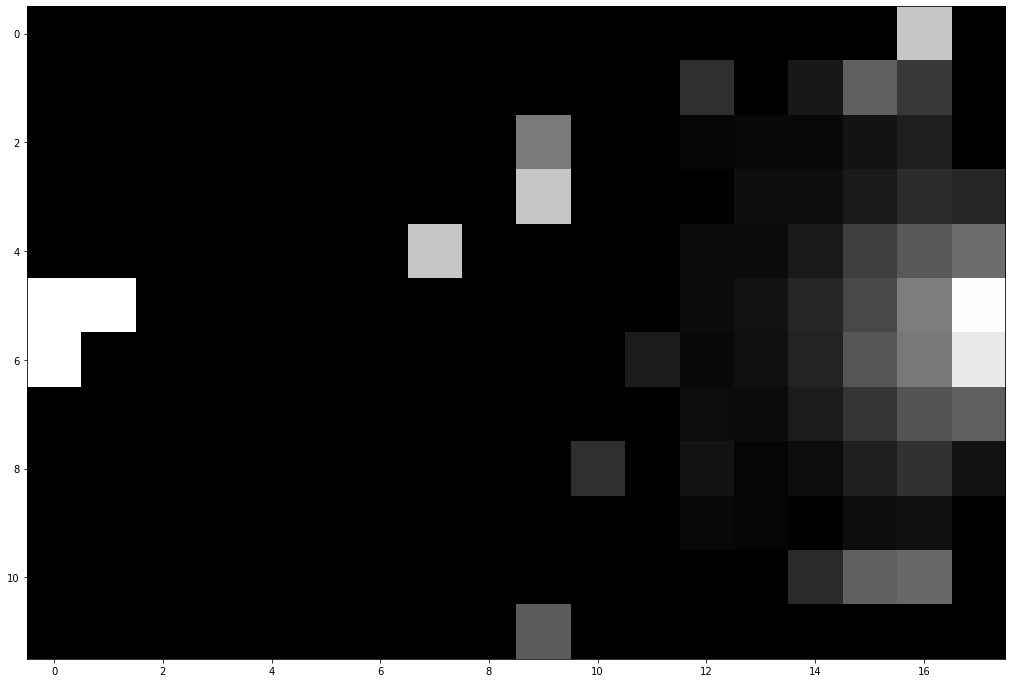

In [67]:
xG = xT.p_score_if_shoot(df_wyscout, wyscout_successful_shot_events, wyscout_failed_shot_events, 'eventSubType', N, M, 105, 68)

fig = plt.figure(figsize=(18,12))
plt.imshow(xG, interpolation='nearest', cmap=cm.Greys_r)

#### xG **WITH** synthetic shots/goals

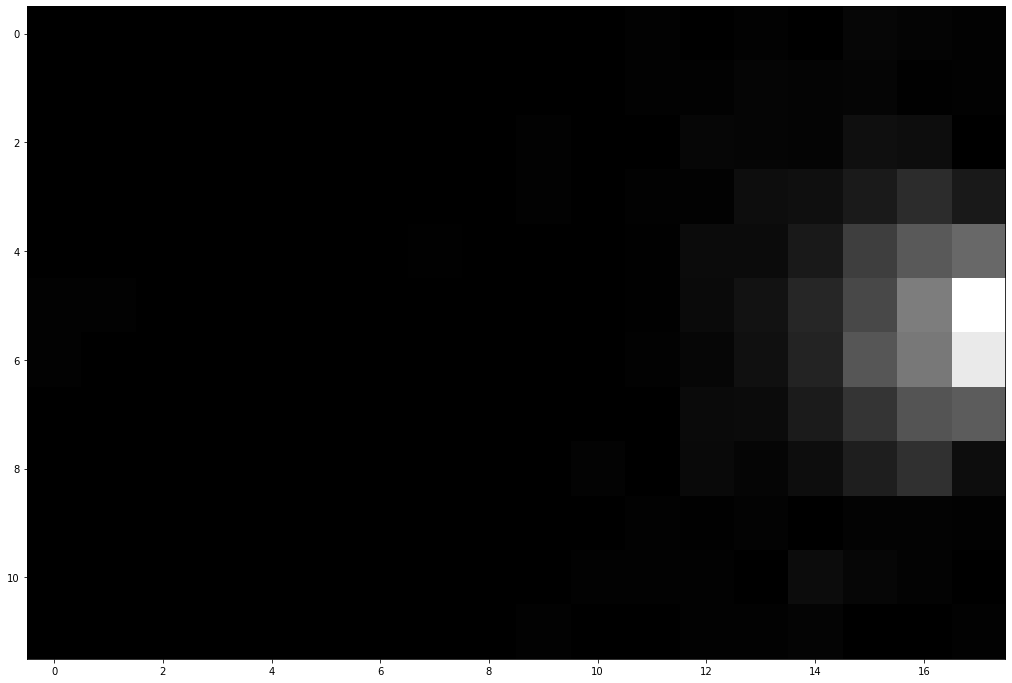

In [68]:
xG = xT.p_score_if_shoot(df_wyscout, wyscout_successful_shot_events, wyscout_failed_shot_events, 'eventSubType', N, M, 105, 68, use_synthetic=1, df_synthetic=df_synthetic)

fig = plt.figure(figsize=(18,12))
plt.imshow(xG, interpolation='nearest', cmap=cm.Greys_r)

#### Probability of shooting

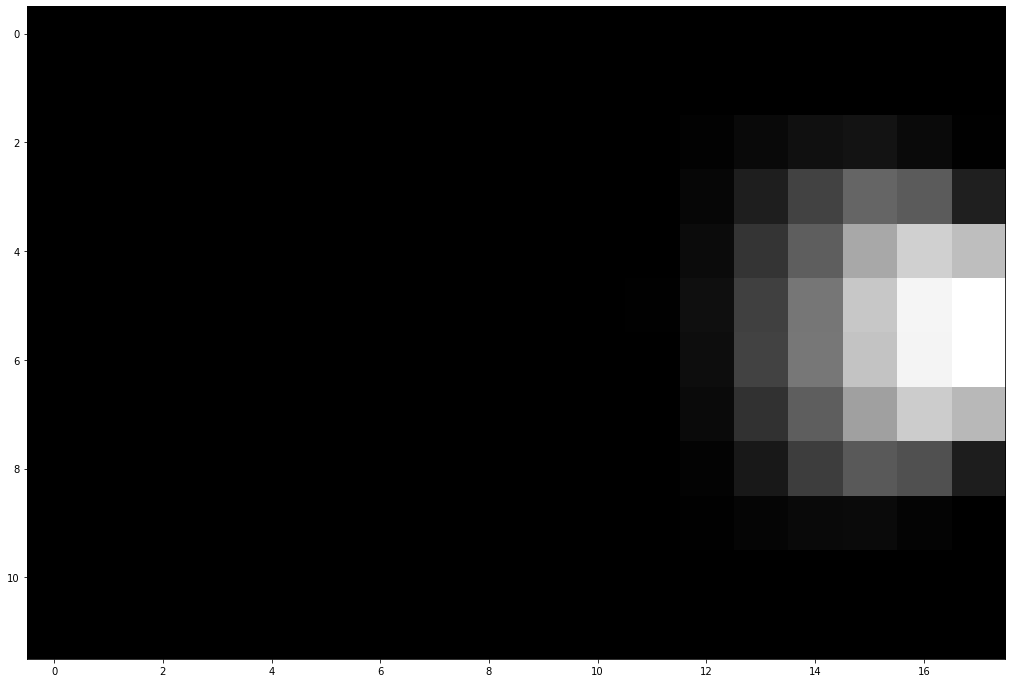

In [69]:
pS, pM = xT.p_shoot_or_move(df_wyscout, wyscout_successful_shot_events, wyscout_failed_shot_events, wyscout_successful_pass_events, wyscout_failed_pass_events, wyscout_successful_dribble_events, wyscout_failed_dribble_events, 'eventSubType', N, M, 105, 68)

fig = plt.figure(figsize=(18,12))
plt.imshow(pS, interpolation='nearest', cmap=cm.Greys_r)

#### Probability of Moving

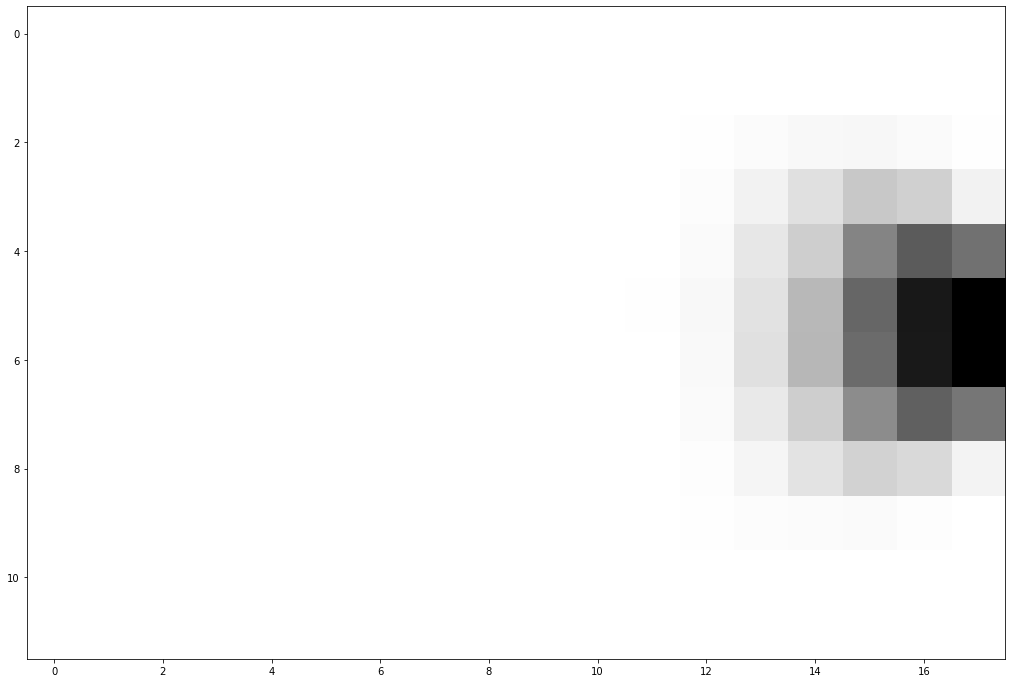

In [70]:
fig = plt.figure(figsize=(18,12))
plt.imshow(pM, interpolation='nearest', cmap=cm.Greys_r)

## 2. Calculating, visualising, and analysing xT **with synthetic shot data**

In [71]:
xT_surface, heatmaps = xT.xT_surface(df_wyscout, wyscout_successful_shot_events, wyscout_failed_shot_events, wyscout_successful_pass_events, wyscout_failed_pass_events, wyscout_successful_dribble_events, wyscout_failed_dribble_events, 'eventSubType', N, M, 105, 68, 1, df_synthetic)

# dumping the Wyscout surface to file
#with open('/Users/christian/Desktop/University/Birkbeck MSc Applied Statistics/Project/Data/Analysis Ready/xT Surfaces/Wyscout_xT_Surface.pkl', 'wb') as f:
    #pickle.dump(xT_surface, f)

# loading the Opta xT surface to check whether differences are because of the data or the mdoel
#with open('/Users/christian/Desktop/University/Birkbeck MSc Applied Statistics/Project/Data/Analysis Ready/xT Surfaces/Original_Opta_xT_Surface.pkl', 'rb') as f:
    #xT_surface = pickle.load(f)
    
xT_interp = xT.bilinear_interp_xT(xT_surface)

df_wyscout['xT'] = xT.apply_xT(df_wyscout, xT_surface, wyscout_successful_pass_events, wyscout_failed_pass_events, wyscout_successful_dribble_events, wyscout_failed_dribble_events, N, M, 105, 68, 100, xT_mode = 3)

Calculating xG...
Calculating pShoot & pMove...
Calculating transition matrix...
Calculating xT value surface...
Running 1 iteration of xT...
Running 2 iteration of xT...
Running 3 iteration of xT...
Running 4 iteration of xT...
Running 5 iteration of xT...
Running 6 iteration of xT...
Running 7 iteration of xT...
Running 8 iteration of xT...
Running 9 iteration of xT...
Running 10 iteration of xT...
Running 11 iteration of xT...
Running 12 iteration of xT...
Running 13 iteration of xT...
Running 14 iteration of xT...
Running 15 iteration of xT...
Running 16 iteration of xT...
Running 17 iteration of xT...
Running 18 iteration of xT...
Running 19 iteration of xT...
Running 20 iteration of xT...
Running 21 iteration of xT...
Running 22 iteration of xT...
Running 23 iteration of xT...
Running 24 iteration of xT...
Running 25 iteration of xT...
Running 26 iteration of xT...
Running 27 iteration of xT...
Running 28 iteration of xT...
Running 29 iteration of xT...
# iterations: 29


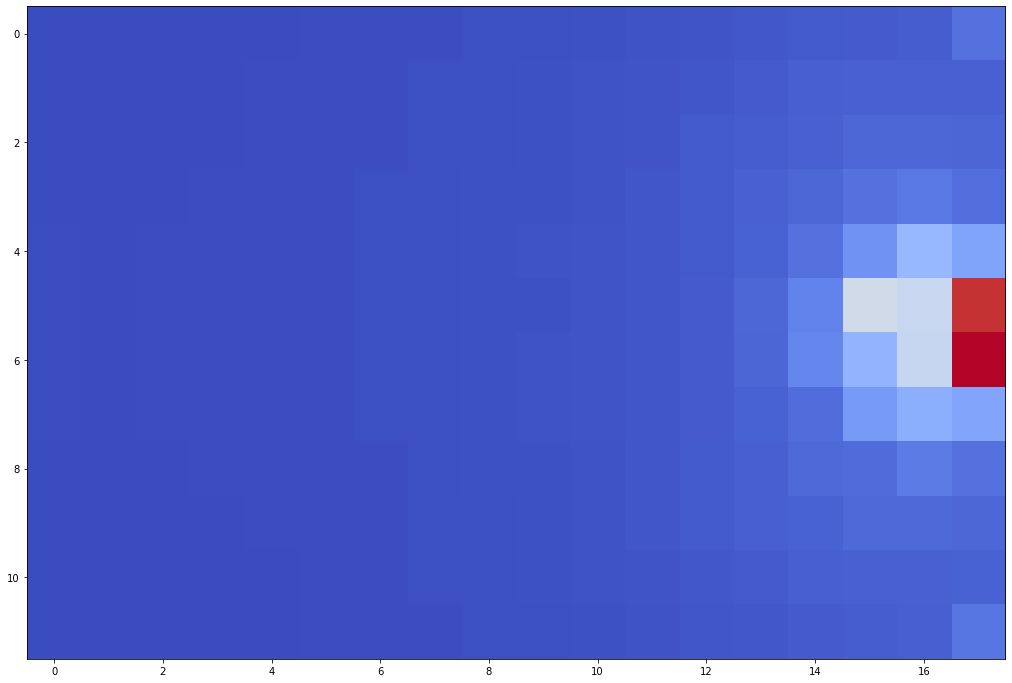

In [72]:
plt.figure(figsize=(18,12))
plt.imshow(xT_surface, interpolation='nearest', cmap=cm.coolwarm)

(-0.5, 1799.5, 1199.5, -0.5)

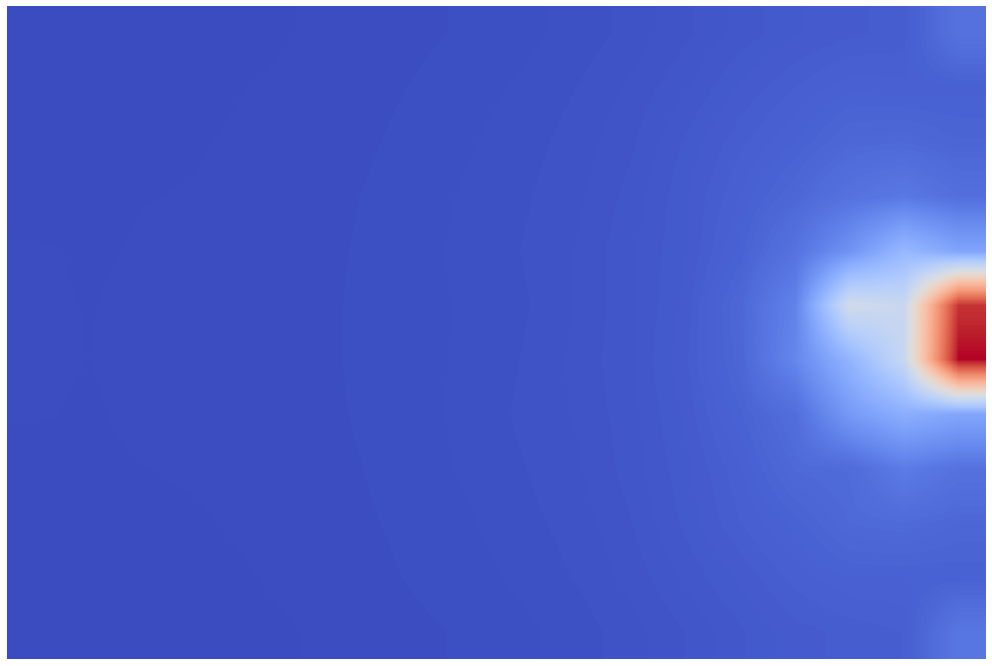

In [73]:
plt.figure(figsize=(18,12))
plt.imshow(xT_interp, interpolation='nearest', cmap=cm.coolwarm)
plt.axis('off')

#plt.savefig(f'bilinear_interp.png', dpi=300, transparent=True)

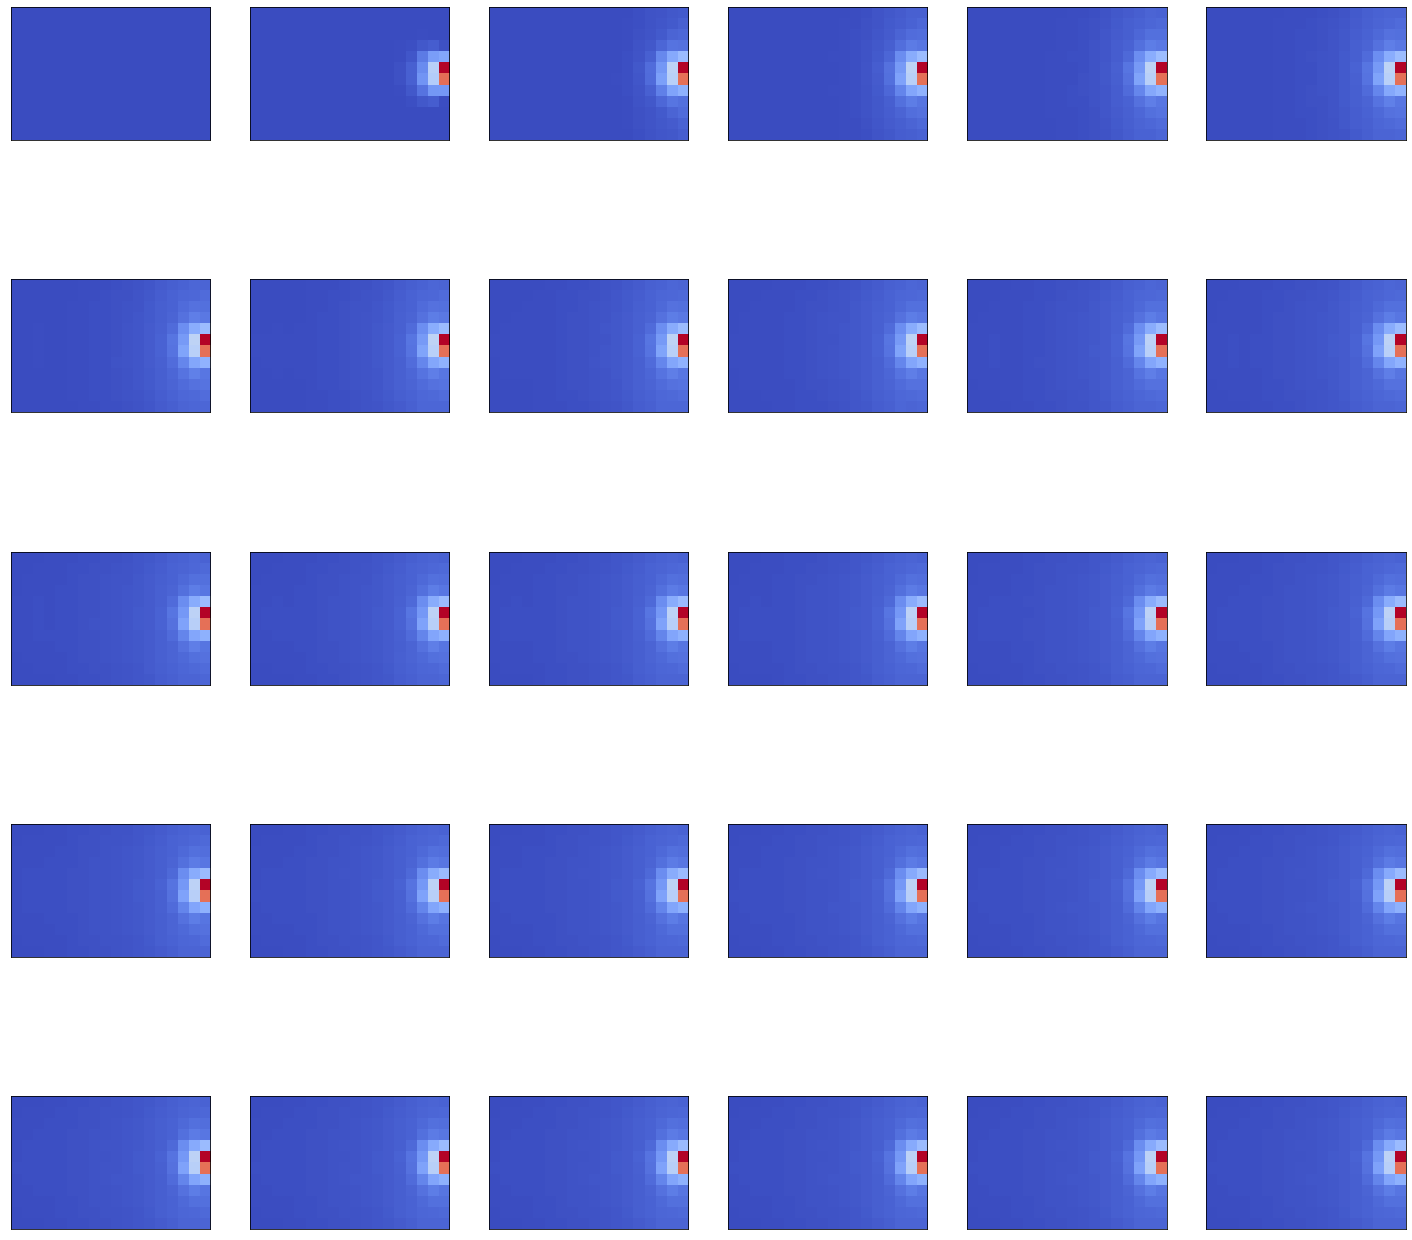

In [74]:
fig, axs = plt.subplots(5,6, figsize=(25, 25), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .01, wspace=.2)

axs = axs.ravel()

for i in range(len(heatmaps)):

    axs[i].imshow(heatmaps[i], interpolation='nearest', cmap=cm.coolwarm)
    axs[i].axes.get_xaxis().set_visible(False)
    axs[i].axes.get_yaxis().set_visible(False)
    
#fig.savefig(f'iterative_solve_xT.png', dpi=300, transparent=True)

---

3. Produce some aggregate metrics per player as part of preliminary analysis

(**Will go into this in far, far more detail in the Interim Report analysis**)

In [75]:
df_wyscout_ref = df_wyscout.merge(df_ref, how='inner', on=['playerId','teamId','matchId'])

df_xT = df_wyscout_ref.groupby(['source','playerId','shortName','matchId'])\
        .agg({'xT':np.sum,'minutesPlayed':np.mean,'x1_m':'count'})\
        .reset_index().rename(columns={'x1_m':'numActions'})\
        .groupby(['source','playerId','shortName'])\
        .agg({'xT':np.sum,'minutesPlayed':np.sum,'numActions':np.sum,'matchId':'nunique'})\
        .reset_index()\
        .rename(columns={'matchId':'numMatches'})\
        .sort_values('xT', ascending=False)

df_xT['xT_per_90'] = (df_xT.xT / df_xT.minutesPlayed) * 90

# min mins filter
df_xT = df_xT.loc[(df_xT['minutesPlayed'] > 180)]

df_xT['source_xT_rank'] = df_xT.sort_values('xT', ascending=False).groupby(['source']).cumcount() + 1
df_xT['source_xT_per_90_rank'] = df_xT.sort_values('xT_per_90', ascending=False).groupby(['source']).cumcount() + 1

# interesting, looks like there's disagreement over the number of minutes played... which obviously makes a difference
# when that's the denominator
df_xT.loc[df_xT['source_xT_per_90_rank'] <= 20].sort_values(['source','source_xT_per_90_rank'], ascending=[True, True])

df_xT.loc[df_xT['source_xT_rank'] <= 20].sort_values(['source','source_xT_rank'], ascending=[True, True])

,source,playerId,shortName,xT,minutesPlayed,numActions,numMatches,xT_per_90,source_xT_rank,source_xT_per_90_rank
324,England,38021,K. De Bruyne,12.646440,3084.0,3972,37,0.369060,1,5
35,England,3361,A. Sánchez,9.977765,2553.0,2660,31,0.351743,2,6
32,England,3350,Fàbregas,9.843327,2319.0,2864,32,0.382018,3,4
26,England,3319,M. Özil,8.355418,2162.0,2539,26,0.347820,4,7
292,England,25553,Azpilicueta,8.335888,3330.0,3710,37,0.225294,5,26
85,England,7939,A. Young,8.103963,2447.0,2423,29,0.298062,6,11
3,England,54,C. Eriksen,7.673375,3226.0,3408,37,0.214074,7,35
154,England,8422,W. Zaha,7.653744,2550.0,2029,29,0.270132,8,16
299,England,25707,E. Hazard,7.493198,2432.0,2477,34,0.277298,9,14
332,England,49872,X. Shaqiri,6.878576,3051.0,2135,36,0.202908,10,41


## Checking our model is in agreement with the SPADL model on the same data

I.e. differences are entirely due to data preparation of the Wyscout data and subsequent xT modelling.

> **All looks fine!** Great vaildation of the model.

In [76]:
spadl_agg = df_spadl.merge(df_ref, how='inner', left_on=['player_id','game_id','team_id'], right_on=['playerId','matchId','teamId'])\
        .merge(df_players, how='inner', on='player_id')\
        .merge(df_teams, how='inner', left_on='team_id', right_on='teamId')\
        .groupby(['teamName','teamType','teamArea','player_id','player_name','game_id'])\
        .agg({'xT_value':np.sum,'minutesPlayed':np.mean,'start_x':'count'})\
        .reset_index().rename(columns={'start_x':'numActions'})\
        .groupby(['teamName','teamType','teamArea','player_id','player_name'])\
        .agg({'xT_value':np.sum,'minutesPlayed':np.sum,'numActions':np.sum,'game_id':'nunique'})\
        .reset_index()\
        .rename(columns={'game_id':'numMatches'})\
        .sort_values('xT_value', ascending=False)

spadl_agg.loc[spadl_agg['teamArea'] == 'England'].head(100)

,teamName,teamType,teamArea,player_id,player_name,xT_value,minutesPlayed,numActions,numMatches
1526,Manchester City,club,England,38021,Kevin De Bruyne,13.265016,3084.0,2472,37
587,Chelsea,club,England,25553,César Azpilicueta Tanco,8.911614,3330.0,2485,37
575,Chelsea,club,England,3350,Francesc Fàbregas i Soler,8.473294,2319.0,1854,32
79,Arsenal,club,England,3319,Mesut Özil,8.044016,2162.0,1780,26
1552,Manchester United,club,England,7939,Ashley Young,7.690652,2447.0,1231,29
588,Chelsea,club,England,25707,Eden Hazard,7.513320,2432.0,1483,34
2396,Tottenham Hotspur,club,England,54,Christian Dannemann Eriksen,7.055662,3226.0,2044,37
1550,Manchester United,club,England,7936,Paul Pogba,6.612179,2167.0,1659,27
7,AFC Bournemouth,club,England,9279,Simon Francis,6.551690,2751.0,1314,32
663,Crystal Palace,club,England,8422,Wilfried Zaha,6.528893,2550.0,784,29


---

# Outputting xT + events data to CSV

In [77]:
df_wyscout.to_csv(os.path.join(cg_xT_repo, 'Full_Wyscout_All_Comps_xT.csv'), index=None)

In [78]:
df_domestic = df_wyscout.loc[df_wyscout['source'].isin(['England','Italy','France','Spain','Germany'])].copy()
df_world_cup = df_wyscout.loc[df_wyscout['source'] == 'World_Cup'].copy()
df_euros = df_wyscout.loc[df_wyscout['source'] == 'European_Championship'].copy()

In [79]:
df_domestic.to_csv(os.path.join(cg_xT_repo, 'Wyscout_Domestic_Comps_xT.csv'), index=None)
df_world_cup.to_csv(os.path.join(cg_xT_repo, 'Wyscout_World_Cup_2018_xT.csv'), index=None)
df_euros.to_csv(os.path.join(cg_xT_repo, 'Wyscout_Euros_2016_xT.csv'), index=None)